<a href="https://colab.research.google.com/github/rybushaikh/Car_Machine_Learning_Project/blob/main/Car_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Reading the dataset

In [ ]:
df = pd.read_csv('/content/car.csv')

Performing EDA

In [ ]:
print(df.describe())

              MPG   Cylinders  Displacement       Weight  Acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       Model Year     US Made  
count  398.000000  398.000000  
mean    76.010050    0.625628  
std      3.697627    0.484569  
min     70.000000    0.000000  
25%     73.000000    0.000000  
50%     76.000000    1.000000  
75%     79.000000    1.000000  
max     82.000000    1.000000  


In [ ]:
print(df.head(5))
print(df.dtypes)

    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   US Made  
0        1  
1        1  
2        1  
3        1  
4        1  
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


**Data Cleansing**

Changing object variables into integer variables

In [ ]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
print(df.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


Checking for NA values in the dataset.

In [ ]:
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


Adding the Prefix to variable Model Year

In [ ]:
# Add 1900 to every value in the 'Model Year' column
df['Model Year'] = df['Model Year'] + 1900

Imputing values in Horsepower with Random Forest


In [ ]:
# Separate the dataset into two parts: one with missing values and one without
df_missing = df[df['Horsepower'].isna()]
df_not_missing = df.dropna(subset=['Horsepower'])

# Define features and target
X = df_not_missing.drop('Horsepower', axis=1)
y = df_not_missing['Horsepower']

# Train a machine learning model (Random Forest Regressor, for example)
model = RandomForestRegressor()
model.fit(X, y)

# Predict missing values
missing_values = model.predict(df_missing.drop('Horsepower', axis=1))

# Fill in missing values
df.loc[df['Horsepower'].isna(), 'Horsepower'] = missing_values

In [ ]:
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


Checking for outliers

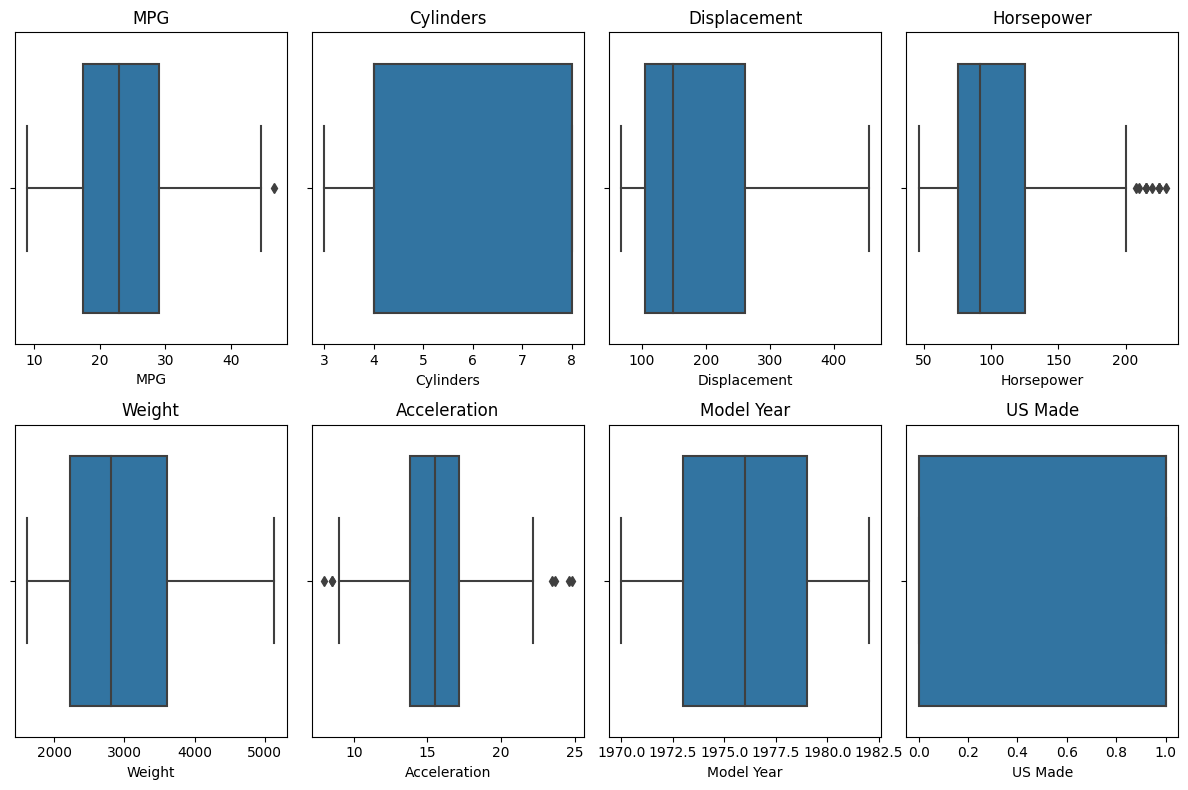

In [ ]:
# Create boxplots for each numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64',]).columns

plt.figure(figsize=(12, 8))
for column in numeric_columns:
    plt.subplot(2, 4, numeric_columns.get_loc(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Imputing outlier values with the mean

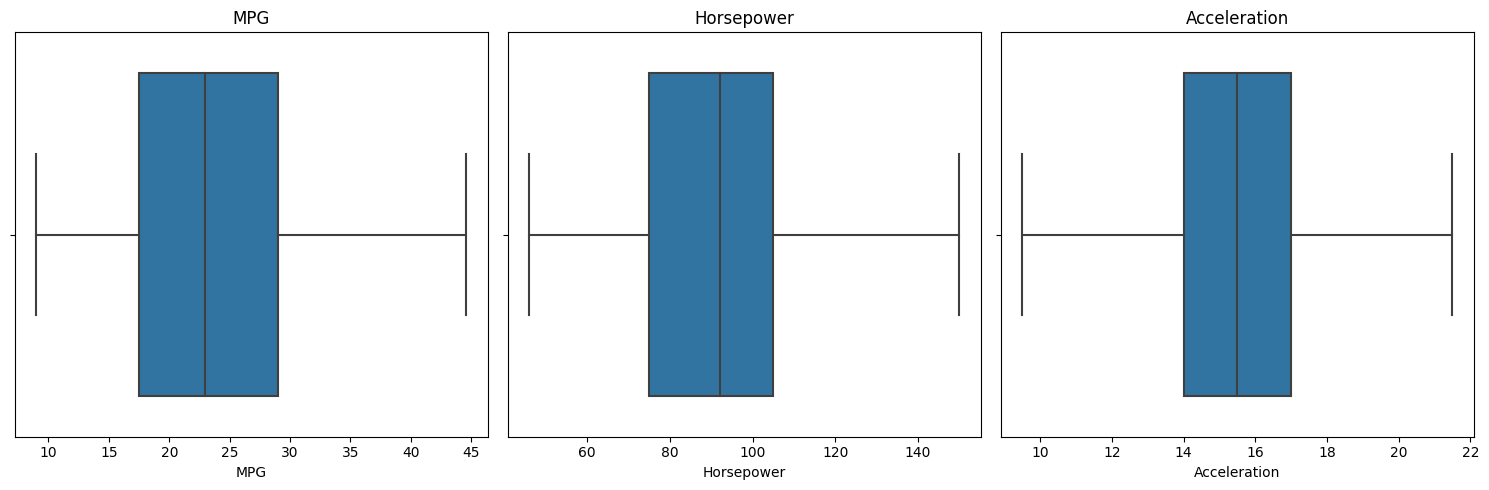

In [ ]:
# Specify the columns of interest
columns_of_interest = ['MPG', 'Horsepower', 'Acceleration']

# Replace outliers with the mean for each specified column
for column in columns_of_interest:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: df[column].mean() if x < lower_limit or x > upper_limit else x)

# Create boxplots after handling outliers
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_of_interest):
    plt.subplot(1, len(columns_of_interest), i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Part 2:**

Correlation matrix

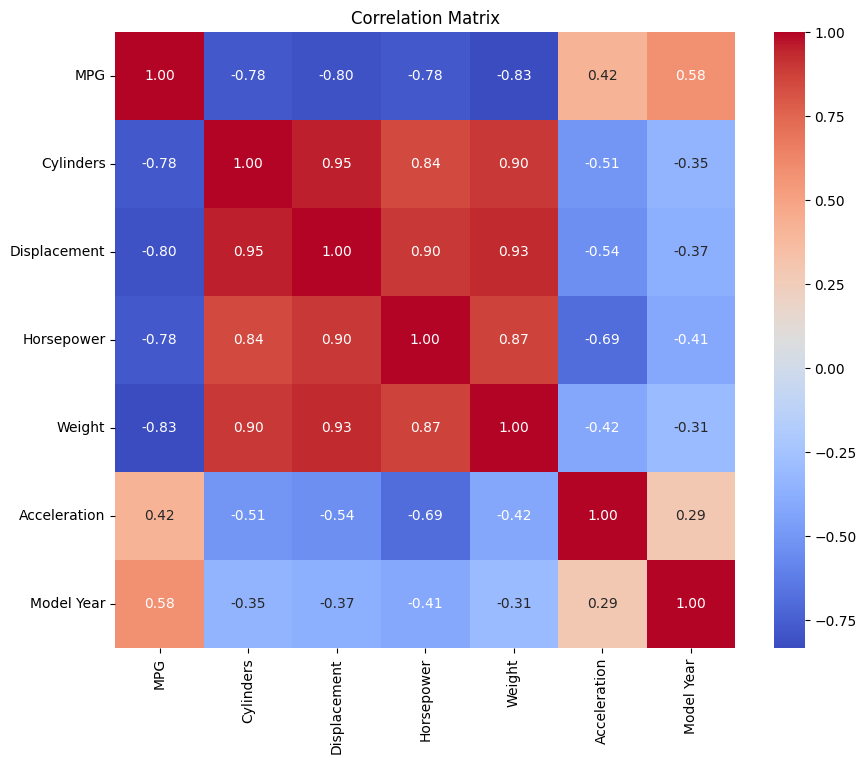

In [ ]:
# Select relevant features for correlation analysis, including 'Model Year'
selected_features = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']

# Create a correlation matrix
correlation_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

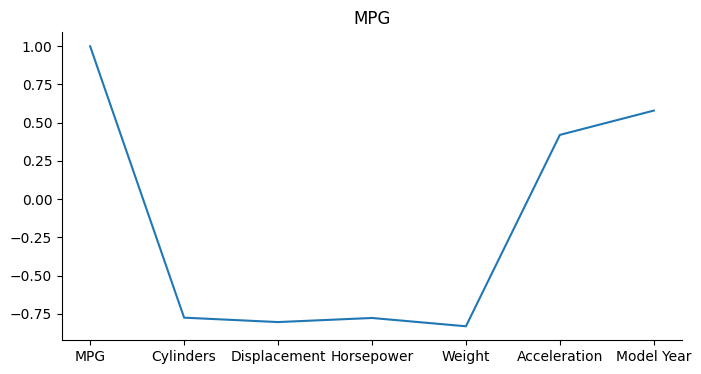

In [ ]:
from matplotlib import pyplot as plt
correlation_matrix['MPG'].plot(kind='line', figsize=(8, 4), title='MPG')
plt.gca().spines[['top', 'right']].set_visible(False)

Linear Regression

Mean Squared Error: 9.44413292829829
R-squared: 0.824348938304139


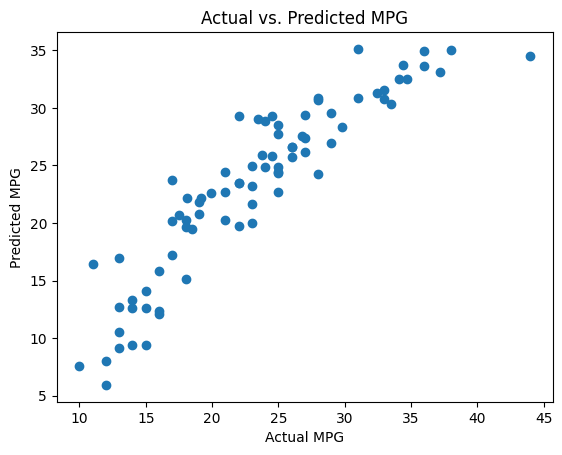

       Variable  Coefficient
0     Cylinders     0.060335
1  Displacement     0.002067
2    Horsepower    -0.001118
3        Weight    -0.006958
4  Acceleration     0.062130
5    Model Year     0.797593


In [ ]:
# Selecting features and target variable
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
target = 'MPG'

# Creating feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizing the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.show()

# Displaying the coefficients of the model
coefficients = pd.DataFrame({'Variable': features, 'Coefficient': model.coef_})
print(coefficients)

Part 3:

In [ ]:

# Assuming 'df' is your DataFrame with the relevant columns
# 'Weight', 'Displacement', 'MPG'

# Selecting features and target variable
features = ['Weight', 'Displacement']
target = 'MPG'

# Creating feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Displaying the summary with p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     456.4
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.03e-103
Time:                        01:23:56   Log-Likelihood:                -1144.3
No. Observations:                 398   AIC:                             2295.
Df Residuals:                     395   BIC:                             2307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.9005      1.159     37.873   

In [ ]:
# Selecting features and target variable
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
target = 'MPG'

# Creating feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Displaying the summary with p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.84e-137
Time:                        00:07:14   Log-Likelihood:                -1053.5
No. Observations:                 398   AIC:                             2121.
Df Residuals:                     391   BIC:                             2149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1448.8717    103.415    -14.010   